In [1]:
import time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import IPython.display as ipd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

### Import Dataset 

In [3]:
df = pd.read_csv('Relavance.csv',index_col = False)
df=df.dropna()
df.head()

,Relavance,Data
0,R,__TiffanyAndCo Cousinnnn the return coming soon
1,I,at the balenciaga thinking about my friends fa...
2,R,TiffanyAndCo bracelet I bought in Milan in Oct...
3,I,QueenMoniB personifier channel_gibbs eccentric...
4,I,Pup_Dior_ Happy Valentines Day You are so gor...


In [4]:
df.shape

(4288, 2)

### Train-test split

In [7]:
# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(df['Data'], df['Relavance'], test_size = 0.30, random_state = 42)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (3001,) (3001,)
Test Set  : (1287,) (1287,)


### TFIDF Vectorization

In [8]:
# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range = (1, 3), binary = True, smooth_idf = False)
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)

### Naive Bayes

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

Best alpha:  1.0


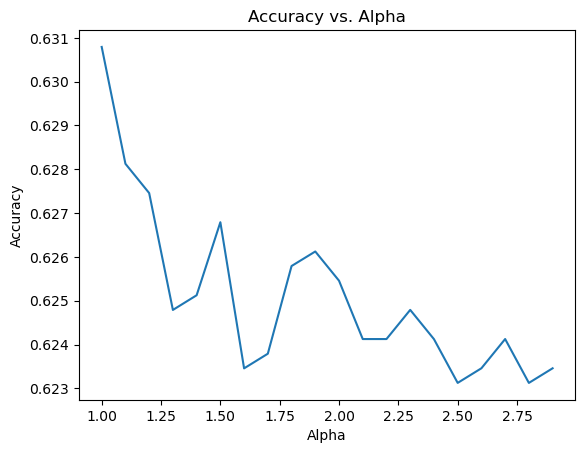

Accuracy: 62.16%
              precision    recall  f1-score   support

           I       0.61      0.99      0.76       772
           R       0.89      0.06      0.12       515

    accuracy                           0.62      1287
   macro avg       0.75      0.53      0.44      1287
weighted avg       0.72      0.62      0.50      1287



<AxesSubplot: >

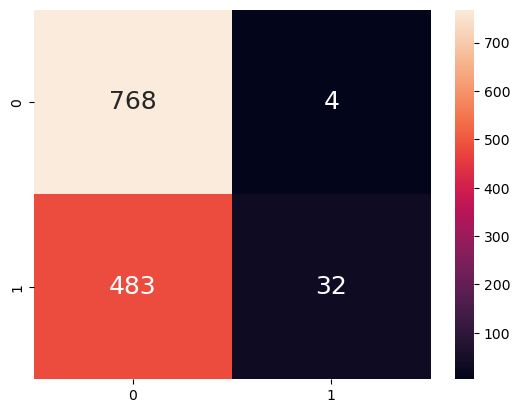

In [10]:
def get_accuracy_CV(model):

    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle = True)

    # Get Accuracy scores
    accuracy = cross_val_score(model, X_train_tfidf, y_train, scoring = "accuracy", cv = kf)

    return accuracy.mean()

res = pd.Series([get_accuracy_CV(MultinomialNB(alpha = i)) for i in np.arange(1, 3, 0.1)], index = np.arange(1, 3, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

plt.plot(res)
plt.title('Accuracy vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

# Compute predicted probabilities
nb_model = MultinomialNB(alpha = best_alpha)
nb_model.fit(X_train_tfidf, y_train)
preds = nb_model.predict(X_test_tfidf)

# Get accuracy over the test set
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print Classification Report
print(classification_report(y_test, preds))

# Plot the Confusion Matrix for Test 
sns.heatmap(confusion_matrix(y_test, preds), 
           annot = True, fmt=".0f", annot_kws={"size": 18})